In [1]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
matplotlib.use('Qt4Agg')
import matplotlib.pyplot as plt
from scipy import stats
from operator import itemgetter
from scipy.stats import sem
from scipy.stats import ks_2samp
from scipy.stats import probplot
from cloveFunctions import *
import statsmodels.api as sm
import statsmodels.stats.power as smp
import pylab
matplotlib.rcParams['figure.figsize'] = (20.0, 10.0)
import warnings
warnings.filterwarnings('ignore')

# filter on variance -- PERFORMED WRONG: FILTER LOW VAR!!

# filter on variance -- 2nd try

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
matplotlib.use('Qt4Agg')
import matplotlib.pyplot as plt
import pickle
import statsmodels.api as sm
import pylab

C:\Users\test\Anaconda3\lib\site-packages\matplotlib\__init__.py:1357: UserWarning:  This call to matplotlib.use() has no effect
because the backend has already been chosen;
matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


In [3]:
t4 = pd.read_hdf('post_fdr_t4_revsor_p_1.hdf')

In [6]:
t4.head()

,link,t_stat,cumu_fdr,bh_pval
idx,,,,
67835305,CDC20&GAGE12B,4.000555,0.996416,0.000173
67835312,CDC20&BTBD19,4.000555,0.992857,0.000173
67835315,CDC20&ALG5,4.000555,0.989324,0.000173
67835314,CDC20&BTBD8,4.000555,0.985816,0.000173
67835313,CDC20&GAGE10,4.000555,0.982332,0.000173


In [8]:
exp = pd.read_pickle('clove/tissueDF_raw/breast_mrna_df.pickle')
cdel = pd.read_pickle('CCLE_DEL_calls.pickle')
cell = pd.read_pickle('ccle_cell_info_df.pickle')

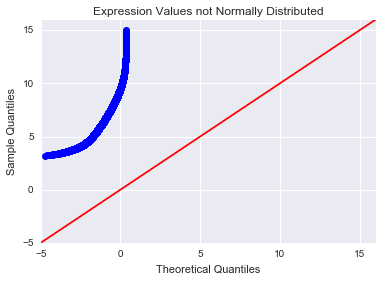

In [12]:
%matplotlib inline
sm.qqplot(exp.values.flatten(), line='45')
pylab.title('Expression Values not Normally Distributed')
pylab.show()

In [6]:


# paris are tuples of ('exp gene', 'cnv_gene')
pairs = [('TACSTD2','AHCYL1'),
         ('CPM','TTTY13'),
         ('ANXA3', 'UTY'), 
         ('GNAZ', 'MDB1'), 
         ('RCOR3', 'HAND1')]

breast_cells = cell[cell['Site Primary'] == 'breast'].index
breast_cells = sorted(list(set(breast_cells).intersection(cdel.columns)))
cdel = cdel[breast_cells]  # cdel refined to only breast cells
# for pair in pairs:
#     exp, cnv = pair[0], pair[1]
#     sep_con = cdel.loc['AHCYL1']
#     pos_context, neg_context = sep_con[sep_con == 1].index, sep_con[sep_con == 0].index

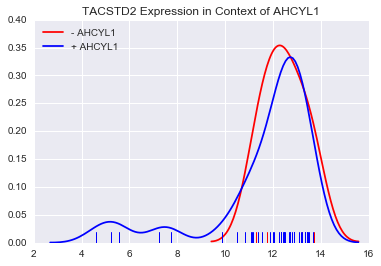

In [5]:
%matplotlib inline
plot_exp_dist(pairs[0])

In [6]:
%matplotlib inline
plot_exp_dist(('ANXA3','UTY'))

no context for  UTY , no present gene


In [7]:
%matplotlib inline
CPM_cnv_select = ['TTTY12','TTTY13','TTTY14','TTTY15','SRY','DAZ2','ZFY','KDM5D','TMSB4Y','RBMY2EP','PCDH11Y','NLGN4Y','GYG2P1','BCORP1']
for gene in CPM_cnv_select:
    plot_exp_dist(('CPM', gene))

no context for  TTTY12 , no present gene
no context for  TTTY13 , no present gene
no context for  TTTY14 , no present gene
no context for  TTTY15 , no present gene
no context for  SRY , no present gene
no context for  DAZ2 , no present gene
no context for  ZFY , no present gene
no context for  KDM5D , no present gene
no context for  TMSB4Y , no present gene
no context for  RBMY2EP , no present gene
no context for  PCDH11Y , no present gene
no context for  NLGN4Y , no present gene
no context for  GYG2P1 , no present gene
no context for  BCORP1 , no present gene


In [8]:
cdel.loc[CPM_cnv_select].sum(axis=1)

Name
TTTY12     59
TTTY13     59
TTTY14     59
TTTY15     59
SRY        59
DAZ2       59
ZFY        59
KDM5D      59
TMSB4Y     59
RBMY2EP    59
PCDH11Y    59
NLGN4Y     59
GYG2P1     59
BCORP1     59
dtype: int64

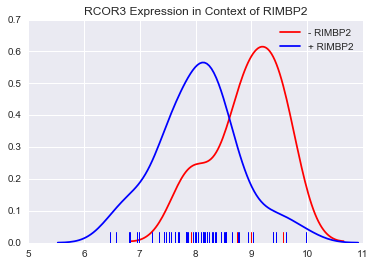

In [9]:
%matplotlib inline
RCOR3_more = ['GALNT7','SCRG1','NBLA00301','USP47','HPGD','CEP44','SAP30','HMGB2','GRIK3','RIMBP2']

plot_exp_dist(('RCOR3', 'RIMBP2'))

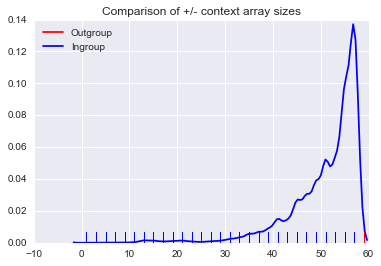

In [10]:
with open('outgroup_contexts.p', 'rb') as fh:
    outgroup = pickle.load(fh)
    
total = cdel.index
ingroup = set(total) - set(outgroup)

# context imbalance
cntxt_imbal_out = []
for gene in outgroup:
    sep_con = cdel.loc[gene]
    pos_context, neg_context = sep_con[sep_con == 1].index, sep_con[sep_con == 0].index
    cntxt_imbal_out.append(abs(len(pos_context) - len(neg_context)))
cntxt_imbal_out = np.array(cntxt_imbal_out)

cntxt_imbal_in = []
for gene in ingroup:
    sep_con = cdel.loc[gene]
    pos_context, neg_context = sep_con[sep_con == 1].index, sep_con[sep_con == 0].index
    cntxt_imbal_in.append(abs(len(pos_context) - len(neg_context)))
cntxt_imbal_in = np.array(cntxt_imbal_in)

%matplotlib inline
sns.kdeplot(cntxt_imbal_out, label="Outgroup", color="r").set_title("Comparison of +/- context array sizes")
sns.kdeplot(cntxt_imbal_in, label="Ingroup", color="b")
sns.rugplot(cntxt_imbal_out, color="r")
sns.rugplot(cntxt_imbal_in, color="b")

In [20]:
cntxt_imbal_out = []
for gene in outgroup:
    sep_con = cdel.loc[gene]
    pos_context, neg_context = sep_con[sep_con == 1].index, sep_con[sep_con == 0].index
    cntxt_imbal_out.append(len(pos_context) - len(neg_context))
cntxt_imbal_out
len(cntxt_imbal_out)

5818

In [21]:
5818 * 20000

116360000

In [12]:
%matplotlib inline
plot_exp_dist(pairs[2])

no context for  UTY , no present gene


In [13]:
%matplotlib inline
plot_exp_dist(pairs[4])

no context for  HAND1 , no missing gene


In [3]:
tstat = pd.read_pickle('clove_exp_grp.p')
exp = pd.read_pickle('clove/tissueDF_raw/breast_mrna_df.pickle')
exp['var'] = exp.var(axis=1)
exp['std'] = exp.std(axis=1)
tstat = tstat[['t_stat']].merge(exp[['var','std']], left_index=True, right_index=True)

variance computed across all expression values per gene, irrespective of context


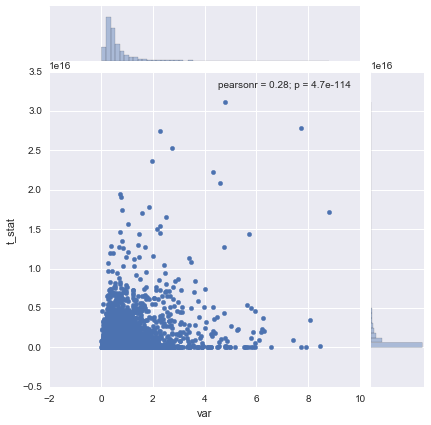

In [55]:
%matplotlib inline 
print("variance computed across all expression values per gene, irrespective of context")
sns.jointplot(data=tstat, y='t_stat', x='var')

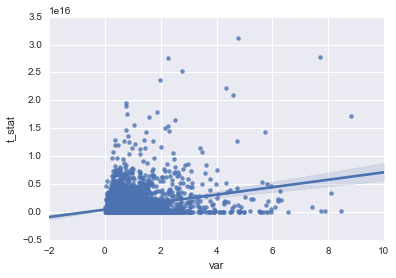

In [12]:
%matplotlib inline 
sns.regplot(data=tstat, y='t_stat', x='var')

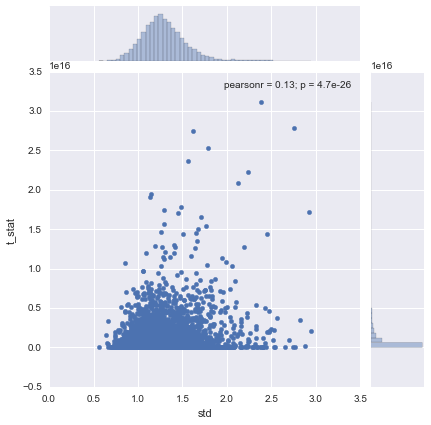

In [13]:
%matplotlib inline 
sns.jointplot(data=tstat, y='t_stat', x='std')

In [9]:
exp = pd.read_pickle('clove/tissueDF_raw/breast_mrna_df.pickle')
exp['var'] = exp.var(axis=1)
exp.sort_values(by='var', inplace = True)
exp = exp[exp['var'].notnull()]
exp.shape

(15302, 60)

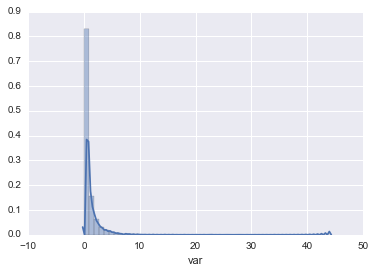

In [10]:
%matplotlib inline
sns.distplot(exp['var'])

In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
exp = pd.read_pickle('clove/tissueDF_raw/breast_mrna_df.pickle')
cdel = pd.read_pickle('CCLE_DEL_calls.pickle')
cell = pd.read_pickle('ccle_cell_info_df.pickle')
breast_cells = cell[cell['Site Primary'] == 'breast'].index
breast_cells = sorted(list(set(breast_cells).intersection(cdel.columns)))
cdel = cdel[breast_cells]

In [7]:
samp = pd.read_pickle('breast_ttest_samp_context.p').sample(100000)
null = pd.read_pickle('breast_ttest_null_samp.p')
samp.shape[0] == null.shape[0]

True

In [8]:
samp['log_t_stat'] = np.log(samp['t_stat'])

C:\Users\test\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: RuntimeWarning: invalid value encountered in log
  if __name__ == '__main__':


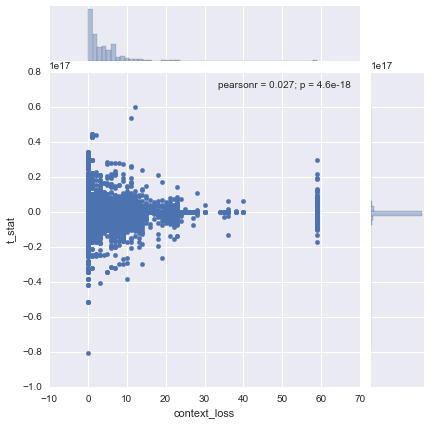

In [9]:
%matplotlib inline
sns.jointplot("context_loss", "t_stat", data=samp)

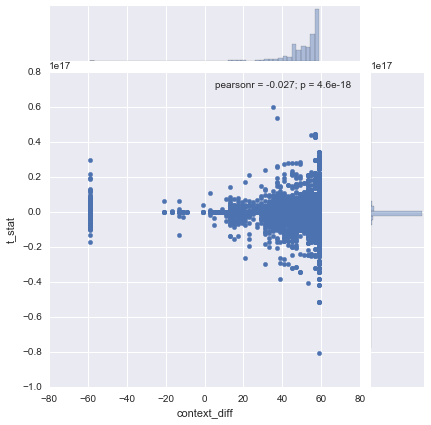

In [10]:
samp['context_diff'] = samp['no_context'] - samp['context_loss']
%matplotlib inline
sns.jointplot("context_diff", "t_stat", data=samp)

In [11]:
null_n_real = pd.concat([samp,null])

C:\Users\test\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


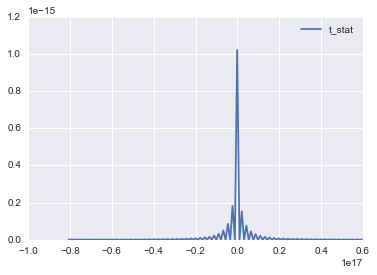

In [12]:
%matplotlib inline
sns.kdeplot(samp['t_stat'].dropna())

In [13]:
cnvdf_mask = pd.read_pickle("CCLE_DEL_calls.pickle")
br_cnvdf_mask= cnvdf_mask[cnvdf_mask.columns[cnvdf_mask.columns.str.contains("BREAST")]] > 0
br_exp = pd.read_pickle('clove/tissueDF_raw/breast_mrna_df.pickle')

In [14]:
br_cnvdf_mask.head()

,HCC2157_BREAST,HS739T_BREAST,HCC38_BREAST,DU4475_BREAST,MDAMB175VII_BREAST,YMB1_BREAST,T47D_BREAST,HS742T_BREAST,KPL1_BREAST,MDAMB231_BREAST,...,HCC1419_BREAST,BT483_BREAST,HS281T_BREAST,HCC1428_BREAST,HS274T_BREAST,ZR7530_BREAST,HS343T_BREAST,CAL51_BREAST,CAL120_BREAST,JIMT1_BREAST
Name,,,,,,,,,,,,,,,,,,,,,
A1BG,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
A1BG-AS1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
A1CF,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
A2LD1,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
A2M,False,False,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [15]:
br_cnvdf_mask.head()

,HCC2157_BREAST,HS739T_BREAST,HCC38_BREAST,DU4475_BREAST,MDAMB175VII_BREAST,YMB1_BREAST,T47D_BREAST,HS742T_BREAST,KPL1_BREAST,MDAMB231_BREAST,...,HCC1419_BREAST,BT483_BREAST,HS281T_BREAST,HCC1428_BREAST,HS274T_BREAST,ZR7530_BREAST,HS343T_BREAST,CAL51_BREAST,CAL120_BREAST,JIMT1_BREAST
Name,,,,,,,,,,,,,,,,,,,,,
A1BG,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
A1BG-AS1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
A1CF,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
A2LD1,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
A2M,False,False,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [16]:
br_exp.head()

,AU565_BREAST,BT20_BREAST,BT474_BREAST,BT483_BREAST,BT549_BREAST,CAL120_BREAST,CAL148_BREAST,CAL51_BREAST,CAL851_BREAST,CAMA1_BREAST,...,MDAMB436_BREAST,MDAMB453_BREAST,MDAMB468_BREAST,SKBR3_BREAST,T47D_BREAST,UACC812_BREAST,UACC893_BREAST,YMB1_BREAST,ZR751_BREAST,ZR7530_BREAST
1/2-SBSRNA4,NaN,NaN,5.401017,5.717574,5.030948,6.448201,5.862162,6.607692,4.712810,5.230651,...,NaN,5.178795,4.992288,5.285821,NaN,6.137365,5.673962,5.461494,NaN,5.352480
A1BG,NaN,NaN,NaN,6.799552,7.599171,8.221060,6.371130,6.126693,NaN,7.742350,...,6.824272,7.822566,NaN,NaN,6.638034,7.041119,NaN,8.521523,7.731496,6.945533
A1BG-AS1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,5.584081,NaN,NaN,NaN,NaN
A2LD1,NaN,NaN,6.085782,6.441127,7.877578,5.075992,6.696254,7.141233,6.933365,6.505857,...,6.193615,4.966001,6.616900,6.069765,6.190813,4.239530,6.767208,6.553315,6.368450,6.027463
A2M,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,7.406219,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:
common = list(set(br_cnvdf_mask.columns).intersection(br_exp.columns))
br_cnvdf_mask = br_cnvdf_mask[common]
br_exp = br_exp[common]

In [19]:
# FILL COLUMN OF VARIANCE OF EXP VALUES GIVEN CNV CONTEXT_LOSS

common = list(set(br_cnvdf_mask.columns).intersection(br_exp.columns))
br_cnvdf_mask = br_cnvdf_mask[common]
br_exp = br_exp[common]

def fx(exp, cnv):
    return np.array(br_exp.loc[exp][br_cnvdf_mask.loc[cnv]]).var()
samp['var'] = np.vectorize(fx)(samp['exp'], samp['cnv'])

C:\Users\test\Anaconda3\lib\site-packages\numpy\core\_methods.py:82: RuntimeWarning: Degrees of freedom <= 0 for slice
  warnings.warn("Degrees of freedom <= 0 for slice", RuntimeWarning)
C:\Users\test\Anaconda3\lib\site-packages\numpy\core\_methods.py:94: RuntimeWarning: invalid value encountered in true_divide
  arrmean, rcount, out=arrmean, casting='unsafe', subok=False)
C:\Users\test\Anaconda3\lib\site-packages\numpy\core\_methods.py:116: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


C:\Users\test\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


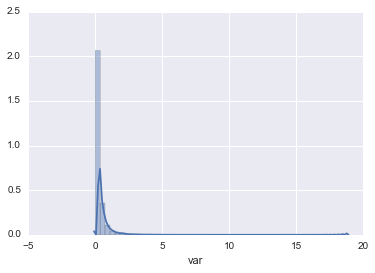

In [20]:
%matplotlib inline
sns.distplot(samp['var'].dropna())

variance computed in expression values per gene according to context
consider only using pairs with context expression > 5


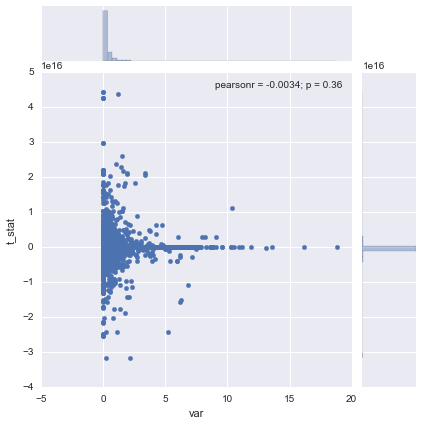

In [21]:
%matplotlib inline 
print("variance computed in expression values per gene according to context")
sns.jointplot(data=samp, y='t_stat', x='var')
print("consider only using pairs with context expression > 5")

In [22]:
f5 = samp[samp['var'] > 5]
f5['log_t_stat'] = np.log(f5['t_stat'])
new = int(f5.shape[0]/100000*79000000)
print('of 79M clove pairs, a var score of >5 reduces to {} pairs'.format(new))

of 79M clove pairs, a var score of >5 reduces to 99540 pairs


C:\Users\test\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: RuntimeWarning: invalid value encountered in log
  from ipykernel import kernelapp as app
C:\Users\test\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


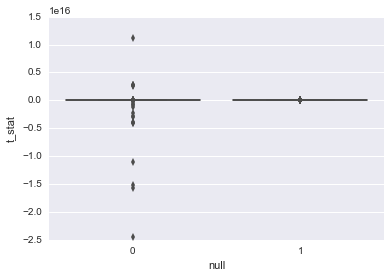

In [23]:
filt = pd.concat([f5, null])
sns.boxplot(x='null', y='t_stat', data=filt)

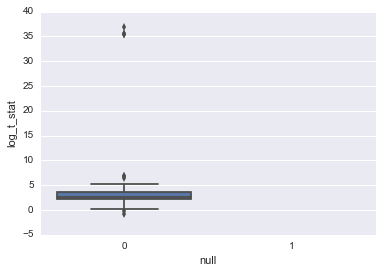

In [24]:
sns.boxplot(x='null', y='log_t_stat', data=filt)

In [25]:
f5.sort_values(by="t_stat", ascending=False, inplace=True)
f5

C:\Users\test\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


,exp,cnv,t_stat,p_val,null,context_loss,no_context,log_t_stat,context_diff,var
1933794,CEACAM6,ATP6V0B,1.116462e+16,0.000000e+00,0,4,55,36.951527,51,10.353160
17929281,LGALS3BP,CHST4,2.783446e+15,0.000000e+00,0,6,53,35.562466,47,7.935803
3034813,CMAHP,LPO,2.688574e+15,0.000000e+00,0,3,56,35.527786,53,6.021751
12260171,DDX60,LOC283692,2.685248e+15,0.000000e+00,0,3,56,35.526550,53,9.076810
12563460,TSPYL5,KCNH1,2.647284e+15,0.000000e+00,0,3,56,35.512310,53,8.178646
19389674,ERP27,SSX2IP,8.960597e+02,0.000000e+00,0,2,57,6.798007,55,5.040683
18671937,ERP27,KLK2,8.960597e+02,0.000000e+00,0,2,57,6.798007,55,13.574420
13622491,H19,SCAMP2,6.185869e+02,0.000000e+00,0,2,57,6.427438,55,9.119307
1073920,PTPRK,FAM75A2,1.900903e+02,0.000000e+00,0,3,56,5.247499,53,6.411417
14254434,CRIP2,LINC00665,6.695370e+01,0.000000e+00,0,3,56,4.204001,53,6.214009


In [26]:
f5[f5['p_val'] > 0]

,exp,cnv,t_stat,p_val,null,context_loss,no_context,log_t_stat,context_diff,var
10984528,ABLIM1,ERCC2,21.174820,1.162797e-41,0,2,57,3.052813,55,5.032951
17577972,ARHGAP29,ZYG11A,20.652752,1.741116e-29,0,5,54,3.027848,49,6.142130
15504700,TM4SF1,C19orf6,19.600132,7.746561e-38,0,5,54,2.975536,49,6.062745
8558266,GULP1,CACNA1C-AS1,19.568727,1.503603e-38,0,3,56,2.973933,53,7.394045
1773164,CDC42EP5,EPM2A,18.732130,7.137769e-37,0,5,54,2.930240,49,5.437891
2599142,ITGA2,AK5,16.949236,3.585443e-33,0,2,57,2.830223,55,5.593547
20993258,OLR1,ZNF180,16.930151,2.540744e-24,0,2,57,2.829096,55,16.160131
15493500,ANXA3,CCDC171,14.881816,9.052157e-23,0,9,50,2.700140,41,5.360803
18929434,CRIM1,ARSJ,14.832788,1.475116e-28,0,4,55,2.696840,51,5.493244
2700555,TMEM45A,PSD4,13.774967,3.609741e-26,0,2,57,2.622853,55,6.754715


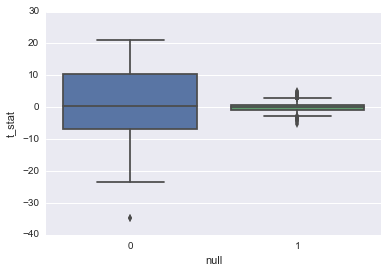

In [27]:
filt = pd.concat([f5[f5['p_val'] > 0], null])
sns.boxplot(x='null', y='t_stat', data=filt)

In [ ]:
import matplotlib
matplotlib.use('Qt4Agg')
import matplotlib.pyplot as plt

no filter


C:\Users\test\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:454: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X>clip[0], X<clip[1])] # won't work for two columns.
C:\Users\test\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:454: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X>clip[0], X<clip[1])] # won't work for two columns.
C:\Users\test\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


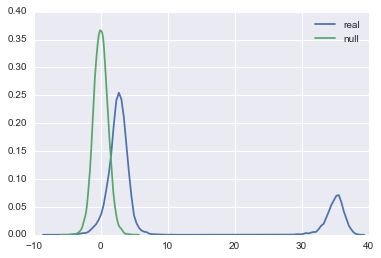

In [31]:
print("no filter")
sns.kdeplot(samp[samp['null']==0]['log_t_stat'], label='real')
sns.kdeplot(filt[filt['null']==1]['t_stat'], label='null')
plt.legend();

filter out variance < 5
79M CLOvE pairs.  After filter: 54510


C:\Users\test\Anaconda3\lib\site-packages\matplotlib\__init__.py:1357: UserWarning:  This call to matplotlib.use() has no effect
because the backend has already been chosen;
matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)
C:\Users\test\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:454: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X>clip[0], X<clip[1])] # won't work for two columns.
C:\Users\test\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:454: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X>clip[0], X<clip[1])] # won't work for two columns.
C:\Users\test\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


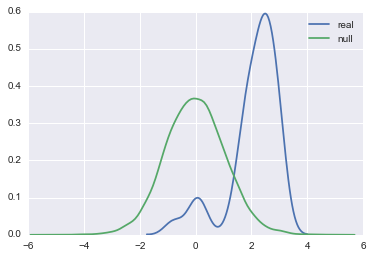

In [30]:

print('filter out variance < 5')
sns.kdeplot(filt[(filt['null']==0) & (filt['var']>5)]['log_t_stat'], label='real')
sns.kdeplot(filt[filt['null']==1]['t_stat'], label='null')
plt.legend();
n_pair = filt[(filt['null']==0) & (filt['var']>5)].shape[0]
n_rat = n_pair/samp.shape[0]*79000000
print("79M CLOvE pairs.  After filter: {}".format(int(n_rat)))

filter out variance < 10
79M CLOvE pairs.  After filter: 4740


C:\Users\test\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:454: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X>clip[0], X<clip[1])] # won't work for two columns.
C:\Users\test\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:454: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X>clip[0], X<clip[1])] # won't work for two columns.
C:\Users\test\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


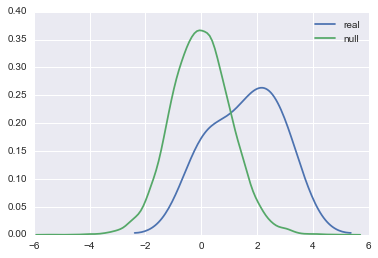

In [32]:
print('filter out variance < 10')
sns.kdeplot(filt[(filt['null']==0) & (filt['var']>10)]['log_t_stat'], label='real')
sns.kdeplot(filt[filt['null']==1]['t_stat'], label='null')
plt.legend();
n_pair = filt[(filt['null']==0) & (filt['var']>10)].shape[0]
n_rat = n_pair/samp.shape[0]*79000000
print("79M CLOvE pairs.  After filter: {}".format(int(n_rat)))

filter out variance < 5 and n < 8
79M CLOvE pairs.  After filter: 3160
find point at which selecting on n reduces p_vals of 0


C:\Users\test\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j
C:\Users\test\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:454: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X>clip[0], X<clip[1])] # won't work for two columns.
C:\Users\test\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:454: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X>clip[0], X<clip[1])] # won't work for two columns.


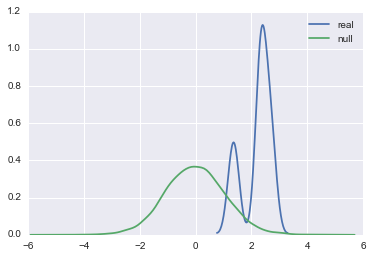

In [33]:
print('filter out variance < 5 and n < 8')
sns.kdeplot(filt[(filt['null']==0) & 
                 (filt['var']>5) & 
                 (filt['context_loss'] > 8)]['log_t_stat'], label='real')
sns.kdeplot(filt[filt['null']==1]['t_stat'], label='null')
plt.legend();
n_pair = filt[(filt['null']==0) & (filt['var']>5) & (filt['context_loss'] > 8)].shape[0]
n_rat = n_pair/samp.shape[0]*79000000
print("79M CLOvE pairs.  After filter: {}".format(int(n_rat)))
print('find point at which selecting on n reduces p_vals of 0')

filter out variance < 5 and p_val == 0
79M CLOvE pairs.  After filter: 54510


C:\Users\test\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:454: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X>clip[0], X<clip[1])] # won't work for two columns.
C:\Users\test\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:454: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X>clip[0], X<clip[1])] # won't work for two columns.
C:\Users\test\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


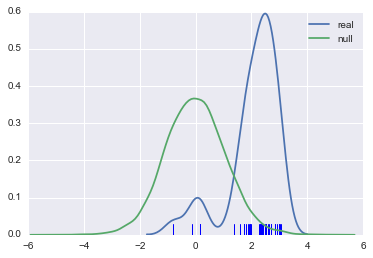

In [34]:
print('filter out variance < 5 and p_val == 0')
sns.kdeplot(filt[(filt['null']==0) & 
                 (filt['var']>5) & 
                 filt['p_val']>0]['log_t_stat'], label='real')
sns.rugplot(filt[(filt['null']==0) & 
                 (filt['var']>5) & 
                 filt['p_val']>0]['log_t_stat'])
sns.kdeplot(filt[filt['null']==1]['t_stat'], label='null')
plt.legend();
n_pair = filt[(filt['null']==0) & (filt['var']>5) & (filt['p_val'] > 0)].shape[0]
n_rat = n_pair/samp.shape[0]*79000000
print("79M CLOvE pairs.  After filter: {}".format(int(n_rat)))

filter out variance < 5 and p_val == 0 and context_loss > 8)
79M CLOvE pairs.  After filter: 3160
too aggressive, may filter some true positives


C:\Users\test\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j
C:\Users\test\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:454: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X>clip[0], X<clip[1])] # won't work for two columns.
C:\Users\test\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:454: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X>clip[0], X<clip[1])] # won't work for two columns.


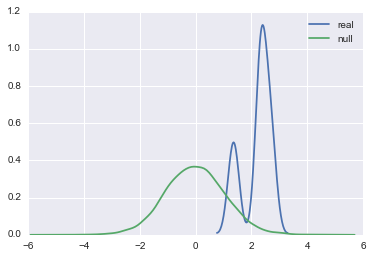

In [35]:
print('filter out variance < 5 and p_val == 0 and context_loss > 8)')
sns.kdeplot(filt[(filt['null']==0) & 
                 (filt['var']>5) & 
                 (filt['p_val']>0) & 
                 (filt['context_loss'] > 8)]['log_t_stat'], label='real')
sns.kdeplot(filt[filt['null']==1]['t_stat'], label='null')
plt.legend();
n_pair = filt[(filt['null']==0) & (filt['var']>5) & (filt['context_loss'] > 8) & (filt['p_val']>0)].shape[0]
n_rat = n_pair/samp.shape[0]*79000000
print("79M CLOvE pairs.  After filter: {}".format(int(n_rat)))
print('too aggressive, may filter some true positives')

filter out variance < 5 and p_val == 0


C:\Users\test\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j
C:\Users\test\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:454: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X>clip[0], X<clip[1])] # won't work for two columns.
C:\Users\test\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:454: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X>clip[0], X<clip[1])] # won't work for two columns.


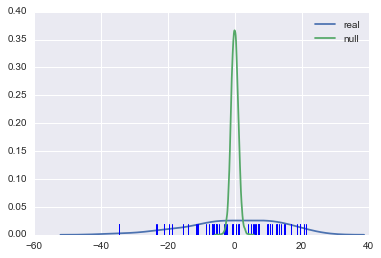

In [36]:
print('filter out variance < 5 and p_val == 0')
sns.kdeplot(filt[(filt['null']==0) & (filt['var']>5) & filt['p_val']>0]['t_stat'], label='real')
sns.rugplot(filt[(filt['null']==0) & (filt['var']>5) & filt['p_val']>0]['t_stat'])
sns.kdeplot(filt[filt['null']==1]['t_stat'], label='null')
plt.legend();

In [54]:
t0_reals = pd.read_pickle('breast_ttest_samp_context.p')
t0_reals = t0_reals[(t0_reals['null']==0) & (t0_reals['p_val']>0) & (t0_reals['context_loss']>8)]

In [58]:
# FILL COLUMN OF VARIANCE OF EXP VALUES GIVEN CNV CONTEXT_LOSS
common = list(set(br_cnvdf_mask.columns).intersection(br_exp.columns))
br_cnvdf_mask = br_cnvdf_mask[common]
br_exp = br_exp[common]

def fx(exp, cnv):
    return np.array(br_exp.loc[exp][br_cnvdf_mask.loc[cnv]]).var()
t0_reals['var'] = np.vectorize(fx)(t0_reals['exp'], t0_reals['cnv'])

In [79]:
t0_reals[t0_reals['cnv'].str.contains('BRCA')].sort_values(by='t_stat',ascending=False)['exp'].to_clipboard()

In [60]:
t0_reals.to_pickle('breast_ttest_samp_context_filt.p')

In [63]:
# AVG vulnerability score for CONTEXT

mean_cnv_t0 = t0_reals.groupby(['cnv'])['t_stat'].mean()
mean_cnv_t0.sort_values(ascending=False, inplace=True)

In [64]:
# AVG vulnerability score for COMPENSATION

mean_exp_t0 = t0_reals.groupby(['exp'])['t_stat'].mean()
mean_exp_t0.sort_values(ascending=False, inplace=True)

(7315,)

In [74]:
mean_exp_t0.head(1000).to_clipboard()

In [65]:
# SUM vulnerability score for CONTEXT

sum_cnv_t0 = t0_reals.groupby(['cnv'])['t_stat'].sum()
sum_cnv_t0.sort_values(ascending=False, inplace=True)

In [66]:
# SUM vulnerability score for COMPENSATION

sum_exp_t0 = t0_reals.groupby(['exp'])['t_stat'].sum()
sum_exp_t0.sort_values(ascending=False, inplace=True)

# Formalize Filters (var and n) based on power analysis

In [3]:
exp_breast = pd.read_pickle('clove/tissueDF_raw/breast_mrna_df.pickle')
cdel = pd.read_pickle('CCLE_DEL_calls.pickle')
cell = pd.read_pickle('ccle_cell_info_df.pickle')

In [4]:
exp_samp = exp_breast.sample(n=10000).index.values
cnv_samp = cdel.sample(n=10000).index.values

Without any filter, NAN omit policy eliminates all but 32% of pairs

In [14]:
df = randomPairContextStat(exp_samp, cnv_samp)

In [15]:
df.dropna().shape[0] / df.shape[0]

0.326

Standard filtration pre-CLOvE computation eliminates all n contexts less than 2, same drop out % using propograte NAN policy

In [16]:
# new samples eliminating all contexts less than 2

# this filtering step requires subsetting cdel to tissue of interest (breast)
cells = list(set(cdel.columns).intersection(exp_breast.columns))
cdel_breast = cdel[cells]

exp_samp = exp_breast.sample(n=10000).index.values
cnv_samp = cdel_breast[cdel_breast.sum(axis=1) > 1].sample(n=10000).index.values

df = randomPairContextStat(exp_samp, cnv_samp, nan_style='propagate')

In [17]:
df.dropna().shape[0] / df.shape[0]

0.3251

Graph percentage of genes lost by variance filter

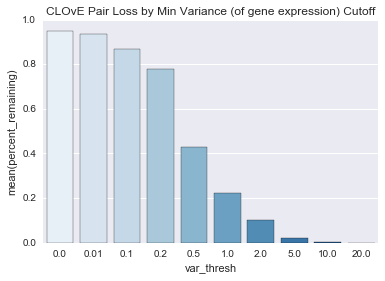

In [21]:
loss_list = [['var_thresh', 'percent_remaining']]
var_levels = [0, 0.01, 0.1, 0.2, 0.5, 1, 2, 5, 10, 20]
for x in var_levels[::-1]:
    lost = df[df['gene_var_exp'] >= x].shape[0] / df.shape[0]
    loss_list.append([x,lost])

header = loss_list.pop(0)
var_filter_df = pd.DataFrame(loss_list, columns=header)

%matplotlib inline
sns.barplot(x="var_thresh", y="percent_remaining", data=var_filter_df, palette="Blues")
plt.title("CLOvE Pair Loss by Min Variance (of gene expression) Cutoff")


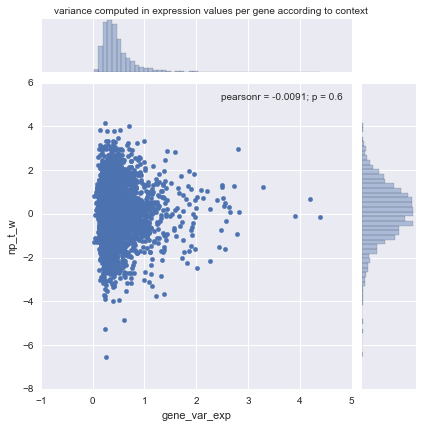

In [18]:
%matplotlib inline 
sns.jointplot(data=df, y='np_t_w', x='gene_var_exp')
plt.suptitle('variance computed in expression values per gene according to context')
plt.subplots_adjust(top=0.95)

Try some variance cutoffs!

variance computed in expression values per gene according to context


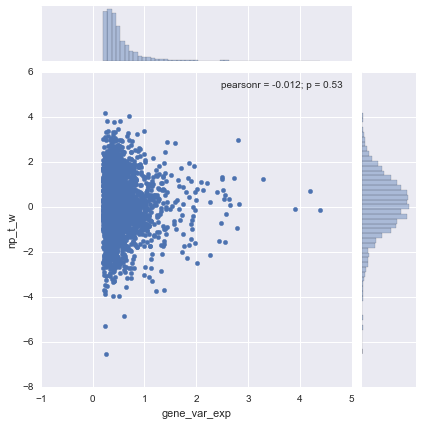

In [22]:
var_cutoff = 0.2
result = df[df['gene_var_exp'] >= var_cutoff]

%matplotlib inline 
print("variance computed in expression values per gene according to context")
sns.jointplot(data=result, y='np_t_w', x='gene_var_exp')

Add global variance from expression values to each gene's expression variance (similar to SAM)

In [23]:
global_var = pd.Series(exp_breast.values.flatten()).dropna().var()

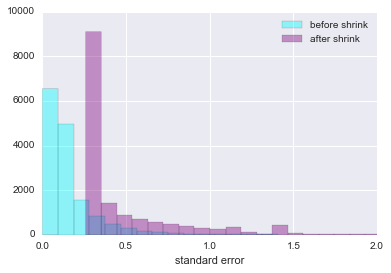

In [24]:
exp_shrink = pd.DataFrame(exp_breast.count(axis=1), columns=['n'])
exp_shrink['var_1'] = exp_breast.var(axis=1)
exp_shrink['std_1'] = exp_breast.std(axis=1)
exp_shrink['se_1'] = exp_shrink['std_1']/np.sqrt(exp_shrink['n'])

exp_shrink['var_2'] = exp_shrink['var_1']+global_var
exp_shrink['std_2'] = np.sqrt(exp_shrink['var_2'])
exp_shrink['se_2'] = exp_shrink['std_2']/np.sqrt(exp_shrink['n'])

exp_shrink.dropna(how='any',inplace='True')

%matplotlib inline
sns.distplot(exp_shrink['se_1'], kde=False, label='before shrink', color='cyan')
sns.distplot(exp_shrink['se_2'], kde=False, label='after shrink', color='purple')
plt.xlim(0,2)
plt.xlabel('standard error')
plt.legend()



Shrinkage attempt via addition of either global or local gene var to sample vars

In [25]:
sdf = df.dropna()
# params: t_welch(nx, ny, mx, my, vx, vy, fudge, tails=2)

# global (all genes in expression matrix)
sdf['t_shrnk_glob'] = np.vectorize(t_welch)(sdf['pos_n'], sdf['neg_n'], sdf['pos_mu'], sdf['neg_mu'], sdf['pos_var'], sdf['neg_var'], global_var)

# local (variance across single gene expression)
sdf['t_shrnk_locl'] = np.vectorize(t_welch)(sdf['pos_n'], sdf['neg_n'], sdf['pos_mu'], sdf['neg_mu'], sdf['pos_var'], sdf['neg_var'], sdf['gene_var_exp'])

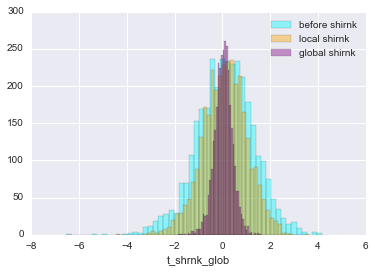

In [97]:
%matplotlib inline
sns.distplot(sdf['np_t_w'], label='before shirnk', kde=False,color='cyan')
sns.distplot(sdf['t_shrnk_locl'], label='local shirnk', kde=False,color='orange')
# gloabl should be the average of variances for all genes, rather than the car of the flattened exp df
sns.distplot(sdf['t_shrnk_glob'], label='global shirnk', kde=False,color='purple')

plt.legend()

Find minimum n for power of 0.7, 0.8, and 0.9

In [31]:
for x in [0.5, 0.6, 0.7, 0.8, 0.9]:
    n = smp.tt_ind_solve_power(effect_size=2, nobs1=None, alpha=0.05, 
                               power=x, ratio=1, alternative='two-sided')
    print(str(x),'\t',str(n))

0.5 	 3.1694302085723525
0.6 	 3.670900711014718
0.7 	 4.280083481920613
0.8 	 5.089994609324693
0.9 	 6.386755384175024


Find power of each CLOvE pair

In [32]:
df['ratio'] = df['neg_n']/df['pos_n']
df['power'] = smp.tt_ind_solve_power(effect_size=df['cohens_d'], nobs1=df['pos_n'], alpha=0.05, power=None, ratio=df['ratio'], alternative='two-sided')

# %matplotlib inline 
# sns.jointplot(data=df, y='np_t_w', x='power')
# plt.suptitle('Power Players')
# plt.subplots_adjust(top=0.95)

In [33]:
df.sort_values(by='power', ascending=False)

,exp,cnv,pos_n,neg_n,pos_mu,neg_mu,pos_var,neg_var,cohens_d,np_t_s,np_p_s,np_t_w,np_p_w,gene_var_exp,ratio,power
3164,ANKFY1,SREBF1,8,51,7.092054,8.068296,0.051477,0.164544,-2.484079,-6.532349,1.905972e-08,-6.532349,1.905972e-08,0.265416,6.375000,1.000000
8427,PPIE,SLC22A12,5,54,6.674806,7.676335,0.189317,0.155850,-2.471186,-5.286417,2.048373e-06,-5.286417,2.048373e-06,0.240565,10.800000,0.999393
9382,C18orf21,CCBE1,14,45,8.395022,9.377898,0.512840,0.394937,-1.485540,-4.854323,9.773950e-06,-4.854323,9.773950e-06,0.608057,3.214286,0.997532
5560,NUP50,STAG3,2,57,8.404887,7.132762,0.001309,0.179465,3.002506,4.173594,1.036101e-04,4.173594,1.036101e-04,0.230328,28.500000,0.983917
219,MIA3,STX12,5,54,9.247302,7.838527,2.193152,0.385193,1.887106,4.036940,1.634069e-04,4.036940,1.634069e-04,0.704284,10.800000,0.977682
5683,MED28,LAP3,5,54,6.705962,7.739105,0.097603,0.318102,-1.855813,-3.969997,2.037474e-04,-3.969997,2.037474e-04,0.388796,10.800000,0.973950
5108,MYO1C,MYO1C,13,46,8.481653,9.274307,0.229964,0.439912,-1.241763,-3.953333,2.151930e-04,-3.953333,2.151930e-04,0.510236,3.538462,0.972943
1836,FAM96B,CTU2,9,50,10.200274,10.814823,0.272060,0.167559,-1.410099,-3.894304,2.609319e-04,-3.894304,2.609319e-04,0.236328,5.555556,0.969114
5965,CDC23,A2M,6,53,10.065974,9.492403,0.161181,0.111930,1.648618,3.827433,3.240492e-04,3.827433,3.240492e-04,0.149526,8.833333,0.964245
4856,ZNF24,SPDYE4,12,47,9.049840,8.242642,0.606404,0.362396,1.236031,3.821580,3.302228e-04,3.821580,3.302228e-04,0.526517,3.916667,0.963790
